# Data 301 Project 1
### 02/06/2022 Abby Berglie

1. Clean the data
2. Determine the salaries for software developers and engineers (S/E) in USD.
3. Determine ...
- the average S/E salary for each currency
- the average S/E salary for each currency based on age
4. (20 pts) Plot the S/E salaries based on age for the top 4 S/E currencies represented in your merged dataset

Highlights: Pandas, Exploratory Data Analysis, Data Cleaning, Finding and Merging data

In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import pycountry

In [2]:
df = pd.read_csv('../data301_proj1/AskAManagerSalarySurvey2021(Responses)-FormResponses.zip')

## Checking how many Nans and data types

In [3]:
df.isnull().sum(axis=0)

Timestamp                                       0
How old are you?                                0
Industry                                       69
Job title                                       0
Additional context on job title             20463
Annual salary                                   0
Other monetary comp                          7146
Currency                                        0
Currency - other                            27427
Additional context on income                24603
Country                                         0
State                                        4911
City                                           75
Overall years of professional experience        0
Years of experience in field                    0
Highest level of education completed          207
Gender                                        164
Race                                          160
dtype: int64

In [4]:
df.rename(columns = {"How old are you?":"Age","Job title":"Job","Additional context on job title":"ExtraJob","Annual salary":"Salary","Other monetary comp":"ExtraMoney","Overall years of professional experience":"ProfExperience","Years of experience in field":"FieldExperience","Highest level of education completed":"Education","Currency - other":"CurrencyOther","Additional context on income":"IncomeContext"},inplace = True)
df.head()
df2 = df


## Replacing NaNs with '' or 0s

In [5]:
df[['Industry', 'ExtraJob', 'IncomeContext', 'CurrencyOther', 'Country', 'State','City','Education', 'Gender', 'Race']] = df[['Industry', 'ExtraJob', 'IncomeContext', 'CurrencyOther', 'Country', 'State','City','Education', 'Gender', 'Race']].fillna('unknown')
df[['Salary','ExtraMoney']] = df[['Salary','ExtraMoney']].fillna(0)

df

,Timestamp,Age,Industry,Job,ExtraJob,Salary,ExtraMoney,Currency,CurrencyOther,IncomeContext,Country,State,City,ProfExperience,FieldExperience,Education,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,unknown,"55,000",0.0,USD,unknown,unknown,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,unknown,"54,600",4000.0,GBP,unknown,unknown,United Kingdom,unknown,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,unknown,"34,000",0.0,USD,unknown,unknown,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,unknown,"62,000",3000.0,USD,unknown,unknown,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,unknown,"60,000",7000.0,USD,unknown,unknown,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27604,1/8/2022 14:37:49,25-34,Retail,Training and Development Coordinator,unknown,41600,2000.0,USD,unknown,unknown,United States,Kentucky,Louisville,5-7 years,2 - 4 years,College degree,Woman,White
27605,1/8/2022 18:13:03,25-34,Computing or Tech,contract manager,unknown,80000,6000.0,CAD,unknown,unknown,canada,unknown,toronto,1 year or less,1 year or less,Master's degree,Woman,White
27606,1/9/2022 12:04:28,25-34,Transport or Logistics,RPA Developer,unknown,75000,0.0,USD,unknown,unknown,USA,Texas,Houston,2 - 4 years,2 - 4 years,College degree,Man,"Hispanic, Latino, or Spanish origin"
27607,1/9/2022 22:49:35,25-34,Computing or Tech,IT Specialist,Desktop Support/Healp Desk,45760,0.0,USD,unknown,unknown,USA,Wisconsin,Oconomowoc,5-7 years,2 - 4 years,College degree,Man,Asian or Asian American


## Removing Punctuations and making lowercase

In [6]:
punc = "[!\"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~\`]"

def punct_remove(x):
    return re.sub(punc, '', x)

df.Salary = df.Salary.map(punct_remove).map(str.lower).map(str.strip)
df.Job = df.Job.map(str.lower).map(str.strip)
df.ExtraJob = df.ExtraJob.map(str.lower).map(str.strip)
df.Country = df.Country.map(punct_remove).map(str.lower).map(str.strip)
df.State = df.State.map(punct_remove).map(str.lower).map(str.strip)
df.City = df.City.map(punct_remove).map(str.lower).map(str.strip)
df.Currency = df.Currency.map(punct_remove).map(str.strip)

df['Salary'] = df['Salary'].astype(float)
df

,Timestamp,Age,Industry,Job,ExtraJob,Salary,ExtraMoney,Currency,CurrencyOther,IncomeContext,Country,State,City,ProfExperience,FieldExperience,Education,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),research and instruction librarian,unknown,55000.0,0.0,USD,unknown,unknown,united states,massachusetts,boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,change & internal communications manager,unknown,54600.0,4000.0,GBP,unknown,unknown,united kingdom,unknown,cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",marketing specialist,unknown,34000.0,0.0,USD,unknown,unknown,us,tennessee,chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,program manager,unknown,62000.0,3000.0,USD,unknown,unknown,usa,wisconsin,milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",accounting manager,unknown,60000.0,7000.0,USD,unknown,unknown,us,south carolina,greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27604,1/8/2022 14:37:49,25-34,Retail,training and development coordinator,unknown,41600.0,2000.0,USD,unknown,unknown,united states,kentucky,louisville,5-7 years,2 - 4 years,College degree,Woman,White
27605,1/8/2022 18:13:03,25-34,Computing or Tech,contract manager,unknown,80000.0,6000.0,CAD,unknown,unknown,canada,unknown,toronto,1 year or less,1 year or less,Master's degree,Woman,White
27606,1/9/2022 12:04:28,25-34,Transport or Logistics,rpa developer,unknown,75000.0,0.0,USD,unknown,unknown,usa,texas,houston,2 - 4 years,2 - 4 years,College degree,Man,"Hispanic, Latino, or Spanish origin"
27607,1/9/2022 22:49:35,25-34,Computing or Tech,it specialist,desktop support/healp desk,45760.0,0.0,USD,unknown,unknown,usa,wisconsin,oconomowoc,5-7 years,2 - 4 years,College degree,Man,Asian or Asian American


## Sorting out Countries

In [7]:
df.Country.value_counts()

united states        9842
usa                  9014
us                   3349
canada               1656
uk                    695
                     ... 
uk for us company       1
canad                   1
cambodia                1
eritrea                 1
canadá                  1
Name: Country, Length: 236, dtype: int64

In [8]:
vals=['usa',  'u s', 'unites states', 'united sates', 'unitedstates', 'united stares', 'united stat', 'america']
def fun1(str_to_find, str_replacement):
    def findandreplace(x):
        if str_to_find in x:
            return str_replacement
        return x
    return findandreplace
for val in vals:
    fn= fun1(val, 'usa')
    df.Country = df.Country.map(fn)
    
df.Country.value_counts()

usa                19466
us                  3349
canada              1656
uk                   695
united kingdom       626
                   ...  
united kingdomk        1
colombia               1
eritrea                1
unted states           1
canadá                 1
Name: Country, Length: 199, dtype: int64

In [9]:
pycountry.countries.lookup('de')
pycountry.countries.lookup('germany')
pycountry.countries.lookup('usa').alpha_3
pycountry.countries.lookup('United States of America')

Country(alpha_2='US', alpha_3='USA', flag='🇺🇸', name='United States', numeric='840', official_name='United States of America')

In [10]:
pycountry.countries.search_fuzzy('wales')

[Country(alpha_2='AU', alpha_3='AUS', flag='🇦🇺', name='Australia', numeric='036')]

In [11]:
from tqdm.auto import tqdm  #tqdm gives you the neat little status bar, useful for very long running operations
tqdm.pandas()
def fix(df, i, cont, search_type):
    '''
    df: dataframe
    i: row
    cont: tuple from pycountry lookup hit 
    search_type: unused-what type of pycountry search was used ()
    '''
    # print(f' {search_type} {cont.alpha_3} for {df.loc[i, "Country"]}')
    df.loc[i, 'found_in_db'] = True  #found column
    df.loc[i, 'Country']=cont.alpha_3  #save the 3 letter alpha character for the country
def find_countries(df):
    #record whether pycountry finds result or not
    for i in tqdm(range(len(df))):  # for every row
        try:
            #try the most accurate lookup first
            res = pycountry.countries.lookup(df.loc[i, 'Country']) 
            #if you get here lookup returned result, use it
            fix(df, i, res, "Accurate swap")
        except LookupError as le:
            #lookup above failed, try fuzzy, you may get many results
            try:
                res = pycountry.countries.search_fuzzy(df.loc[i, 'Country'])
                #if you get here search_fuzzy returned result, should you use it?
                #SHOULD CHECK CONFIDENCE, THIS CODE DOES NOT
                fix(df, i, res[0], "Fuzzy swap")
            except LookupError as le:
                pass
    return df


df = find_countries(df)

  0%|          | 0/27609 [00:00<?, ?it/s]

In [12]:
df.Country.value_counts()

USA                                        22821
CAN                                         1659
UGA                                          696
GBR                                          636
AUS                                          388
                                           ...  
SVN                                            1
CUB                                            1
united kingdomk                                1
ERI                                            1
company in germany i work from pakistan        1
Name: Country, Length: 174, dtype: int64

## Combine the two Monitary columns to have a total amount of money for each person

In [13]:
df['TotalMoney'] = df['Salary']+df['ExtraMoney']
df

,Timestamp,Age,Industry,Job,ExtraJob,Salary,ExtraMoney,Currency,CurrencyOther,IncomeContext,Country,State,City,ProfExperience,FieldExperience,Education,Gender,Race,found_in_db,TotalMoney
0,4/27/2021 11:02:10,25-34,Education (Higher Education),research and instruction librarian,unknown,55000.0,0.0,USD,unknown,unknown,USA,massachusetts,boston,5-7 years,5-7 years,Master's degree,Woman,White,True,55000.0
1,4/27/2021 11:02:22,25-34,Computing or Tech,change & internal communications manager,unknown,54600.0,4000.0,GBP,unknown,unknown,GBR,unknown,cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,True,58600.0
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",marketing specialist,unknown,34000.0,0.0,USD,unknown,unknown,USA,tennessee,chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,True,34000.0
3,4/27/2021 11:02:41,25-34,Nonprofits,program manager,unknown,62000.0,3000.0,USD,unknown,unknown,USA,wisconsin,milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,True,65000.0
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",accounting manager,unknown,60000.0,7000.0,USD,unknown,unknown,USA,south carolina,greenville,8 - 10 years,5-7 years,College degree,Woman,White,True,67000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27604,1/8/2022 14:37:49,25-34,Retail,training and development coordinator,unknown,41600.0,2000.0,USD,unknown,unknown,USA,kentucky,louisville,5-7 years,2 - 4 years,College degree,Woman,White,True,43600.0
27605,1/8/2022 18:13:03,25-34,Computing or Tech,contract manager,unknown,80000.0,6000.0,CAD,unknown,unknown,CAN,unknown,toronto,1 year or less,1 year or less,Master's degree,Woman,White,True,86000.0
27606,1/9/2022 12:04:28,25-34,Transport or Logistics,rpa developer,unknown,75000.0,0.0,USD,unknown,unknown,USA,texas,houston,2 - 4 years,2 - 4 years,College degree,Man,"Hispanic, Latino, or Spanish origin",True,75000.0
27607,1/9/2022 22:49:35,25-34,Computing or Tech,it specialist,desktop support/healp desk,45760.0,0.0,USD,unknown,unknown,USA,wisconsin,oconomowoc,5-7 years,2 - 4 years,College degree,Man,Asian or Asian American,True,45760.0


In [14]:
#df2['State'].unique()

## Making a consistant currency column without "Other"s

To do this, I begin by looking at what information people had put into the *CurrencyOther* column. 
I created a copy of the dataframe, **df2**, and created another column that was a copy of the *Currency* column but called it *UseCurrency*. This column will have all of the "Other" values replaced with what was in that corresponding row's *CurrencyOther* column. 
For every unique value in *CurrencyOther*, I wanted to pull something from there that was like a currency and put that into the the *UseCurrency* column. 

In [15]:
df2.CurrencyOther.value_counts()
df['CurrencyOther'].unique()

array(['unknown', 'INR', 'Peso Argentino', '$76,302.34',
       'My bonus is based on performance up to 10% of salary',
       'I work for an online state university, managing admissions data. Not direct tech support. ',
       '0', 'MYR', 'CHF', 'KWD', 'NOK', 'Na ', 'USD', 'BR$', 'SEK',
       'Base plus Commission ', 'canadian', 'Dkk', 'EUR', 'COP', 'TTD',
       'Indian rupees', 'BRL (R$)', 'Mexican pesos', 'CZK', 'GBP', 'DKK',
       'Bdt', 'RSU / equity', 'ZAR', 'Additonal = Bonus plus stock',
       'American Dollars', 'Php', 'PLN (Polish zloty)',
       'Overtime (about 5 hours a week) and bonus', 'czech crowns',
       'Stock ', 'TRY', 'Norwegian kroner (NOK)', 'CNY', 'ILS/NIS',
       '55,000', 'AUD & NZD are not the same currency...', 'US Dollar',
       'Canadian ', 'AUD', 'BRL', 'NIS (new Israeli shekel)', '-',
       'RMB (chinese yuan)', 'Taiwanese dollars',
       "AUD and NZD aren't the same currency, and have absolutely nothing to do with each other :(",
       'NZD', 

In [16]:
#testing =  df2.loc[df2['CurrencyOther'].str.contains('MYR')]
#testing

In [17]:
df2['UseCurrency'] = df2['Currency']

#def fun1(row):
 #   currencies = {"USD":['USD', 'US', 'America'],"NOK":['NOK'], "DKK":['DKK', 'dkk', 'Dkk', 'Danish'], 'EUR':['EUR', 'Euro'],
  #                'ARS':["ARS", 'Argent'], "MYR":['MYR'],"INR":['INR','rupee'],'CZK':['CZK','chezech crowns', 'Czk',], 
   #              'PLN':['PLN', 'zloty', 'Polish'], 'ILS': ['ILS','NIS','Israeli', 'Ils'],'PHP':['PHP', 'Philippine', 'Php'], 
    #             'AUD':['AUD', 'Australian'], 'SGD':['SGD', 'Sgd', 'SGD '], 'BRL':['BR$', 'BRL']}
    #for key, vals in currencies.items() :
     #   for val in vals:
      #      if val in row.CurrencyOther:
       #         row.Usecurency=key
                
#df2['UseCurrency']=df2.apply(lambda row :fun1, axis = 1)
df2['UseCurrency'].unique()
df2.UseCurrency.value_counts()

USD       23016
CAD        1650
GBP        1569
EUR         622
AUDNZD      495
Other       143
CHF          37
SEK          37
JPY          23
ZAR          13
HKD           4
Name: UseCurrency, dtype: int64

In [18]:
#df2.UseCurrency.value_counts()
df2=df2[["Timestamp", "Age", "Industry", "Job", "ExtraJob", "TotalMoney", "Salary", "ExtraMoney", "UseCurrency", "Currency", "CurrencyOther", "IncomeContext", "Country", "State", "City", "ProfExperience", "FieldExperience", "Education", "Gender", "Race", "found_in_db"]]
df2

,Timestamp,Age,Industry,Job,ExtraJob,TotalMoney,Salary,ExtraMoney,UseCurrency,Currency,...,IncomeContext,Country,State,City,ProfExperience,FieldExperience,Education,Gender,Race,found_in_db
0,4/27/2021 11:02:10,25-34,Education (Higher Education),research and instruction librarian,unknown,55000.0,55000.0,0.0,USD,USD,...,unknown,USA,massachusetts,boston,5-7 years,5-7 years,Master's degree,Woman,White,True
1,4/27/2021 11:02:22,25-34,Computing or Tech,change & internal communications manager,unknown,58600.0,54600.0,4000.0,GBP,GBP,...,unknown,GBR,unknown,cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,True
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",marketing specialist,unknown,34000.0,34000.0,0.0,USD,USD,...,unknown,USA,tennessee,chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,True
3,4/27/2021 11:02:41,25-34,Nonprofits,program manager,unknown,65000.0,62000.0,3000.0,USD,USD,...,unknown,USA,wisconsin,milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,True
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",accounting manager,unknown,67000.0,60000.0,7000.0,USD,USD,...,unknown,USA,south carolina,greenville,8 - 10 years,5-7 years,College degree,Woman,White,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27604,1/8/2022 14:37:49,25-34,Retail,training and development coordinator,unknown,43600.0,41600.0,2000.0,USD,USD,...,unknown,USA,kentucky,louisville,5-7 years,2 - 4 years,College degree,Woman,White,True
27605,1/8/2022 18:13:03,25-34,Computing or Tech,contract manager,unknown,86000.0,80000.0,6000.0,CAD,CAD,...,unknown,CAN,unknown,toronto,1 year or less,1 year or less,Master's degree,Woman,White,True
27606,1/9/2022 12:04:28,25-34,Transport or Logistics,rpa developer,unknown,75000.0,75000.0,0.0,USD,USD,...,unknown,USA,texas,houston,2 - 4 years,2 - 4 years,College degree,Man,"Hispanic, Latino, or Spanish origin",True
27607,1/9/2022 22:49:35,25-34,Computing or Tech,it specialist,desktop support/healp desk,45760.0,45760.0,0.0,USD,USD,...,unknown,USA,wisconsin,oconomowoc,5-7 years,2 - 4 years,College degree,Man,Asian or Asian American,True


Now we can continue with a known Currency for each row

## Pulling out all the Software Engineers/ Developers or anything else related

In [19]:
searching = ['software engineer', 'software developer', 'programer']

df_SE1   = df2.loc[df["Job"].str.contains('programmer')]
df_SE12    = df2.loc[df["ExtraJob"].str.contains('programmer')]
df_SE15 = df2.loc[df["Job"].str.contains('software engineer')]
df_SE16 =  df2.loc[df["ExtraJob"].str.contains('software engineer')]
df_SE17 =  df2.loc[df["Job"].str.contains('software')]
df_SE18 =  df2.loc[df["ExtraJob"].str.contains('software')]

df_SE = pd.concat([df_SE1, df_SE12, df_SE15,df_SE16, df_SE17, df_SE18])

df_SE


,Timestamp,Age,Industry,Job,ExtraJob,TotalMoney,Salary,ExtraMoney,UseCurrency,Currency,...,IncomeContext,Country,State,City,ProfExperience,FieldExperience,Education,Gender,Race,found_in_db
20,4/27/2021 11:03:24,25-34,Health care,data programmer analyst,unknown,74000.0,74000.0,0.0,USD,USD,...,unknown,USA,pennsylvania,philadelphia,5-7 years,5-7 years,Master's degree,Woman,White,True
65,4/27/2021 11:04:33,25-34,Education (Higher Education),research programmer,software engineering without the job title,70000.0,70000.0,0.0,USD,USD,...,"Technically 37.5 hours, but ends up being pret...",USA,rhode island,providence,5-7 years,2 - 4 years,Master's degree,Non-binary,White,True
236,4/27/2021 11:07:08,35-44,Health care,principal statistical programmer,unknown,195000.0,165000.0,30000.0,USD,USD,...,unknown,USA,massachusetts,boston,21 - 30 years,21 - 30 years,College degree,Non-binary,White,True
383,4/27/2021 11:09:08,25-34,Computing or Tech,programmer analyst 2,unknown,68000.0,65000.0,3000.0,USD,USD,...,unknown,USA,missouri,jefferson city,8 - 10 years,8 - 10 years,College degree,Woman,White,True
429,4/27/2021 11:09:50,35-44,Education (Primary/Secondary),programmer analyst,unknown,82000.0,82000.0,0.0,USD,USD,...,unknown,USA,wisconsin,madison,11 - 20 years,11 - 20 years,College degree,Man,White,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27193,10/26/2021 13:09:16,25-34,Engineering or Manufacturing,production manager,"manufacturing, not software",77000.0,70000.0,7000.0,CAD,CAD,...,unknown,CAN,unknown,vancouver,8 - 10 years,5-7 years,Master's degree,Man,White,True
27198,10/26/2021 13:11:15,25-34,Computing or Tech,software engineer,embedded robotics software engineer,87500.0,85000.0,2500.0,USD,USD,...,unknown,USA,pennsylvania,pittsburgh,2 - 4 years,1 year or less,Master's degree,Man,White,True
27260,10/26/2021 13:55:04,25-34,Computing or Tech,scrum master,coach and lead software teams,92000.0,92000.0,0.0,USD,USD,...,unknown,USA,colorado,fort collins,2 - 4 years,2 - 4 years,College degree,Man,Asian or Asian American,True
27268,10/26/2021 14:01:56,25-34,Health care,epic cogito analyst/clinical business intellig...,"requires certifications in epic software, paid...",80300.0,73000.0,7300.0,USD,USD,...,"retention bonuses of 2.5%, 2.5% and 10% were p...",USA,new york,buffalo,11 - 20 years,8 - 10 years,College degree,Woman,White,True


In [70]:
df2.head()

,Timestamp,Age,Industry,Job,ExtraJob,TotalMoney,Salary,ExtraMoney,UseCurrency,Currency,...,IncomeContext,Country,State,City,ProfExperience,FieldExperience,Education,Gender,Race,found_in_db
0,4/27/2021 11:02:10,25-34,Education (Higher Education),research and instruction librarian,unknown,55000.0,55000.0,0.0,USD,USD,...,unknown,USA,massachusetts,boston,5-7 years,5-7 years,Master's degree,Woman,White,True
1,4/27/2021 11:02:22,25-34,Computing or Tech,change & internal communications manager,unknown,58600.0,54600.0,4000.0,GBP,GBP,...,unknown,GBR,unknown,cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,True
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",marketing specialist,unknown,34000.0,34000.0,0.0,USD,USD,...,unknown,USA,tennessee,chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,True
3,4/27/2021 11:02:41,25-34,Nonprofits,program manager,unknown,65000.0,62000.0,3000.0,USD,USD,...,unknown,USA,wisconsin,milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,True
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",accounting manager,unknown,67000.0,60000.0,7000.0,USD,USD,...,unknown,USA,south carolina,greenville,8 - 10 years,5-7 years,College degree,Woman,White,True


In [78]:
df_SE.UseCurrency.value_counts()

def fun12(row):
    currencies = {"USD":['USD', 'US', 'America'],"NOK":['NOK'], "DKK":['DKK', 'dkk', 'Dkk', 'Danish'], 'EUR':['EUR', 'Euro'],
                'ARS':["ARS", 'Argent'], "MYR":['MYR'],"INR":['INR','rupee'],'CZK':['CZK','chezech crowns', 'Czk',], 
                 'PLN':['PLN', 'zloty', 'Polish'], 'ILS': ['ILS','NIS','Israeli', 'Ils'],'PHP':['PHP', 'Philippine', 'Php'], 
                 'AUD':['AUD', 'Australian'], 'SGD':['SGD', 'Sgd', 'SGD '], 'BRL':['BR$', 'BRL']}
    for key, vals in currencies.items() :
        for val in vals:
            if val in row.CurrencyOther:
                return key
    return row.UseCurrency
                
df_SE['UseCurrency']=df_SE.apply(fun12, axis=1)
# df2=df2.apply(fun12)
df_SE.UseCurrency.value_counts()



# df_SE.head()

USD       2124
GBP        183
EUR        120
CAD        106
AUDNZD      30
CHF          6
BRL          6
SEK          4
AUD          3
INR          3
ILS          2
CZK          2
SGD          2
Other        1
MYR          1
Name: UseCurrency, dtype: int64

In [61]:
df_SE2 = df_SE
df_SE2 = df_SE2.drop(['Salary', 'ExtraMoney', 'Currency','CurrencyOther', 'IncomeContext', 'found_in_db'],axis = 1)
df_SE2

,Timestamp,Age,Industry,Job,ExtraJob,TotalMoney,UseCurrency,Country,State,City,ProfExperience,FieldExperience,Education,Gender,Race
20,4/27/2021 11:03:24,25-34,Health care,data programmer analyst,unknown,74000.0,USD,USA,pennsylvania,philadelphia,5-7 years,5-7 years,Master's degree,Woman,White
65,4/27/2021 11:04:33,25-34,Education (Higher Education),research programmer,software engineering without the job title,70000.0,USD,USA,rhode island,providence,5-7 years,2 - 4 years,Master's degree,Non-binary,White
236,4/27/2021 11:07:08,35-44,Health care,principal statistical programmer,unknown,195000.0,USD,USA,massachusetts,boston,21 - 30 years,21 - 30 years,College degree,Non-binary,White
383,4/27/2021 11:09:08,25-34,Computing or Tech,programmer analyst 2,unknown,68000.0,USD,USA,missouri,jefferson city,8 - 10 years,8 - 10 years,College degree,Woman,White
429,4/27/2021 11:09:50,35-44,Education (Primary/Secondary),programmer analyst,unknown,82000.0,USD,USA,wisconsin,madison,11 - 20 years,11 - 20 years,College degree,Man,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27193,10/26/2021 13:09:16,25-34,Engineering or Manufacturing,production manager,"manufacturing, not software",77000.0,CAD,CAN,unknown,vancouver,8 - 10 years,5-7 years,Master's degree,Man,White
27198,10/26/2021 13:11:15,25-34,Computing or Tech,software engineer,embedded robotics software engineer,87500.0,USD,USA,pennsylvania,pittsburgh,2 - 4 years,1 year or less,Master's degree,Man,White
27260,10/26/2021 13:55:04,25-34,Computing or Tech,scrum master,coach and lead software teams,92000.0,USD,USA,colorado,fort collins,2 - 4 years,2 - 4 years,College degree,Man,Asian or Asian American
27268,10/26/2021 14:01:56,25-34,Health care,epic cogito analyst/clinical business intellig...,"requires certifications in epic software, paid...",80300.0,USD,USA,new york,buffalo,11 - 20 years,8 - 10 years,College degree,Woman,White


## Convert *TotalMoney* to USD

In [63]:
df_convert = pd.read_csv("../data301_proj1/media/conversion_table.csv")
df_convert = df_convert.drop(['Name'],axis = 1)
#df_convert

We let out 'x' dataset be our *df_SE2* and our 'y' data set is our currency conversion. In our conversion table, they use "AUD" insted of "AUDNZD", so we change our *UseCurrency* column to match.

In [64]:
def fun2(str_to_find, str_replacement):
    def findandreplace(x):
        if str_to_find in x:
            return str_replacement
        return x
    return findandreplace
fn= fun2('AUDNZD', 'AUD')
df_SE2.UseCurrency = df_SE2.UseCurrency.map(fn)
df_SE2['UseCurrency']. value_counts()

USD      2123
GBP       183
EUR       118
CAD       106
AUD        32
Other      21
CHF         6
SEK         4
Name: UseCurrency, dtype: int64

In [65]:
Currencies= df_SE2['UseCurrency'].unique()
Currencies.tolist()

['USD', 'EUR', 'CAD', 'GBP', 'Other', 'CHF', 'AUD', 'SEK']

In [43]:
# lets see what overlaps
xk = df_SE2.loc[:, 'UseCurrency']
yk = df_convert.loc[:, 'CurrencyType']
print(f' unique key values present in both x and y is {set(yk).intersection(set(xk))}')


 unique key values present in both x and y is {'CAD', 'AUD', 'CHF', 'GBP', 'EUR', 'SEK', 'USD'}


Since this is equal to currencies I j=have in *df_SE2* I can proceed and merge the data sets.
Once thats done, we create a new USD column by multiplying *TotalMoney* and *usd*

In [44]:
df_SE3 = pd.merge(df_SE2, df_convert, left_on='UseCurrency', right_on='CurrencyType', how='left')
#df_SE3

In [45]:
df_SE3['CurrencyUSD'] = df_SE3['TotalMoney']*df_SE3['Units_per_USD']
#df_SE3

## The Average Salary for each Currency

In [46]:
Ave_dic = {}
values = []
for x in Currencies:
    j=(df_SE3.loc[df_SE3["UseCurrency"].str.contains(x)])["CurrencyUSD"].mean()
    j = round(j,2)
    values.append(j)
for j in range(0,8):
    Ave_dic[Currencies[j]]=values[j]
for j in Ave_dic:
    print('The Average Salary of ',j,':', Ave_dic[j])


The Average Salary of  USD : 177214.29
The Average Salary of  EUR : 69663.74
The Average Salary of  CAD : 176731.67
The Average Salary of  GBP : 61669.76
The Average Salary of  Other : nan
The Average Salary of  CHF : 102547.05
The Average Salary of  AUD : 221679.38
The Average Salary of  SEK : 8552973.38


## Average Salary per Currency based on Age

In [47]:
age1 =  df_SE3.loc[df_SE3['Age'].str.contains('25-34')]
age2 =  df_SE3.loc[df_SE3['Age'].str.contains('35-44')]
age3 =  df_SE3.loc[df_SE3['Age'].str.contains('45-54')]
age4 =  df_SE3.loc[df_SE3['Age'].str.contains('55-64')]
age5 =  df_SE3.loc[df_SE3['Age'].str.contains('65 or over')]

In [48]:

Ave_dic1 = {}
values = []
for x in Currencies:
    j=(age1.loc[age1["UseCurrency"].str.contains(x)])["CurrencyUSD"].mean()
    if isinstance(j,float):
        j = round(j,2)
    else:
        j = 'none'
    values.append(j)
for j in range(0,8):
    Ave_dic1[Currencies[j]]=values[j]
for j in Ave_dic1:
    print('The Average Salary for Ages 25-34 --- ',j,':', Ave_dic1[j])

The Average Salary for Ages 25-34 ---  USD : 172253.52
The Average Salary for Ages 25-34 ---  EUR : 66142.73
The Average Salary for Ages 25-34 ---  CAD : 154231.37
The Average Salary for Ages 25-34 ---  GBP : 57211.28
The Average Salary for Ages 25-34 ---  Other : nan
The Average Salary for Ages 25-34 ---  CHF : 98389.73
The Average Salary for Ages 25-34 ---  AUD : 190057.73
The Average Salary for Ages 25-34 ---  SEK : 6921612.83


In [49]:

Ave_dic2 = {}
values = []
for x in Currencies:
    j=(age2.loc[age2["UseCurrency"].str.contains(x)])["CurrencyUSD"].mean()
    if isinstance(j,float):
        j = round(j,2)
    else:
        j = 'none'
    values.append(j)
for j in range(0,8):
    Ave_dic2[Currencies[j]]=values[j]
for j in Ave_dic2:
    print('The Average Salary for Age 35-44 --- ',j,':', Ave_dic2[j])

The Average Salary for Age 35-44 ---  USD : 193906.81
The Average Salary for Age 35-44 ---  EUR : 76996.14
The Average Salary for Age 35-44 ---  CAD : 172207.35
The Average Salary for Age 35-44 ---  GBP : 66982.58
The Average Salary for Age 35-44 ---  Other : nan
The Average Salary for Age 35-44 ---  CHF : nan
The Average Salary for Age 35-44 ---  AUD : 235833.54
The Average Salary for Age 35-44 ---  SEK : 10184333.94


In [50]:

Ave_dic3 = {}
values = []
for x in Currencies:
    j=(age3.loc[age3["UseCurrency"].str.contains(x)])["CurrencyUSD"].mean()
    if isinstance(j,float):
        j = round(j,2)
    else:
        j = 'none'
    values.append(j)
for j in range(0,8):
    Ave_dic3[Currencies[j]]=values[j]
for j in Ave_dic3:
    print('The Average Salary for Ages 45-54 --- ',j,':', Ave_dic3[j])

The Average Salary for Ages 45-54 ---  USD : 183832.66
The Average Salary for Ages 45-54 ---  EUR : 83385.02
The Average Salary for Ages 45-54 ---  CAD : 283545.39
The Average Salary for Ages 45-54 ---  GBP : 71258.06
The Average Salary for Ages 45-54 ---  Other : nan
The Average Salary for Ages 45-54 ---  CHF : 110861.67
The Average Salary for Ages 45-54 ---  AUD : 288768.4
The Average Salary for Ages 45-54 ---  SEK : nan


In [51]:
Ave_dic4 = {}
values = []
for x in Currencies:
    j=(age4.loc[age4["UseCurrency"].str.contains(x)])["CurrencyUSD"].mean()
    if isinstance(j,float):
        j = round(j,2)
    else:
        j = 'none'
    values.append(j)
for j in range(0,8):
    Ave_dic4[Currencies[j]]=values[j]
for j in Ave_dic4:
    print('The Average Salary for Ages 55-64 --- ',j,':', Ave_dic4[j])

The Average Salary for Ages 55-64 ---  USD : 154114.39
The Average Salary for Ages 55-64 ---  EUR : 63510.81
The Average Salary for Ages 55-64 ---  CAD : 170933.53
The Average Salary for Ages 55-64 ---  GBP : 74416.38
The Average Salary for Ages 55-64 ---  Other : nan
The Average Salary for Ages 55-64 ---  CHF : nan
The Average Salary for Ages 55-64 ---  AUD : nan
The Average Salary for Ages 55-64 ---  SEK : nan


In [52]:

Ave_dic5 = {}
values = []
for x in Currencies:
    j=(age5.loc[age5["UseCurrency"].str.contains(x)])["CurrencyUSD"].mean()
    if isinstance(j,float):
        j = round(j,2)
    else:
        j = 'none'
    values.append(j)
for j in range(0,8):
    Ave_dic5[Currencies[j]]=values[j]
for j in Ave_dic5:
    print('The Average Salary for Age 65 and older --- ',j,':', Ave_dic5[j])

The Average Salary for Age 65 and older ---  USD : 151857.14
The Average Salary for Age 65 and older ---  EUR : nan
The Average Salary for Age 65 and older ---  CAD : nan
The Average Salary for Age 65 and older ---  GBP : nan
The Average Salary for Age 65 and older ---  Other : nan
The Average Salary for Age 65 and older ---  CHF : nan
The Average Salary for Age 65 and older ---  AUD : nan
The Average Salary for Age 65 and older ---  SEK : nan


## Plot salaries based on age for top 4 currencies represented in the merged dataset

In [85]:
##Use this to find the top 4 currencies in our dataset....USD, GBP, CAD and EUR
#df_SE3.UseCurrency.value_counts()

In [53]:
#Now, we make a new dataframe that contains only the top 4 currencies

df_SE00 =  df_SE3.loc[df_SE3['UseCurrency'].str.contains('USD')]
df_SE01 =  df_SE3.loc[df_SE3['UseCurrency'].str.contains('GBP')]
df_SE02 =  df_SE3.loc[df_SE3['UseCurrency'].str.contains('CAD')]
df_SE03 =  df_SE3.loc[df_SE3['UseCurrency'].str.contains('EUR')]
df_SE_top4 = pd.concat([df_SE00,df_SE01, df_SE02,df_SE03])

df_SE_top4.rename(columns = {"UseCurrency":"Currency","TotalMoney":"Salary"},inplace = True)

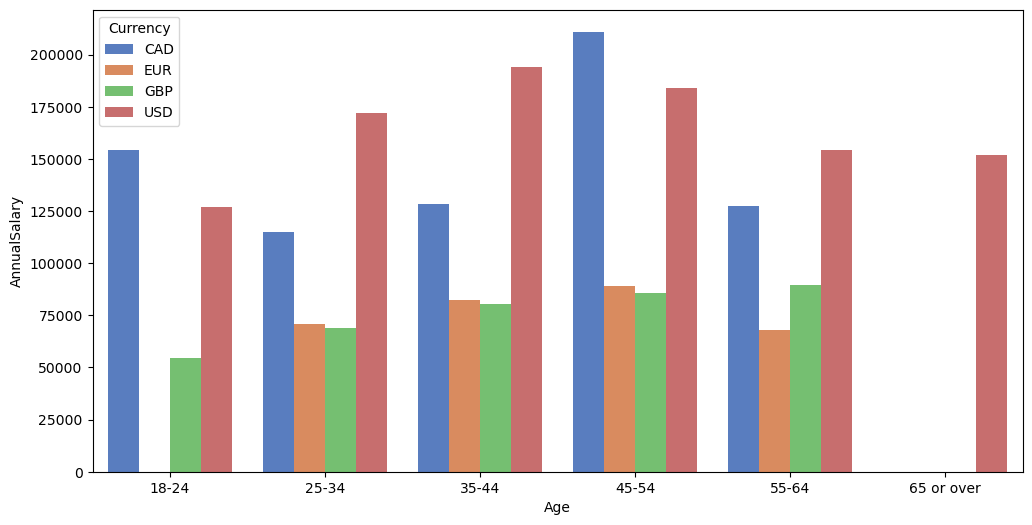

In [54]:
working=df_SE_top4.groupby(['Currency','Age']).agg(AnnualSalary=('Salary', 'mean'))
working=working.reset_index()
fig,ax = plt.subplots(figsize=(12,6))

_=sns.barplot(data=working,x='Age', y='AnnualSalary', hue='Currency',palette='muted', ax=ax )